In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import matplotlib.pyplot as plt
from orbithunter.arrayops import swap_modes
%matplotlib inline
import time
from scipy.optimize import root

There are many many different ways to generate initial conditions, the easiest of which is to simply generate
random modes, and then scale them to the relevant scales. 

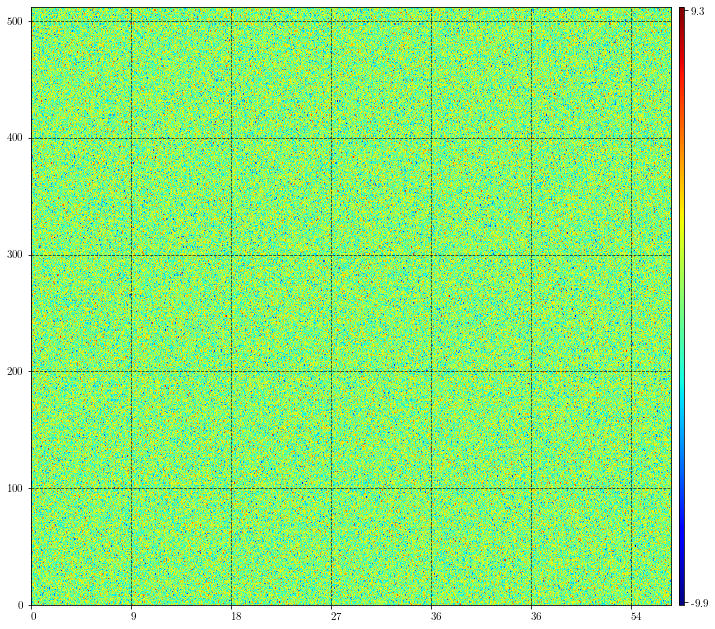

In [7]:
o = OrbitKS(T=512, L=512, seed=0, magnitude=10)
o.plot()

In [146]:
o = OrbitKS(T=512, L=512, seed=0, magnitude=0.5, rescaling_method='power', spectrum='exponential', tscale=1, xscale=m, xvar=20, tvar=t_var).rescale(3,rescaling_method='absolute')

o.plot()

In [ ]:
tscale, xscale, x_var, t_var = (7, 57, 7.54983443527075, 2.6457513110645907)
large_orbit_guess = OrbitKS(T=512, L=512, seed=0, magnitude=0.4, rescaling_method='power', spectrum='random', tscale=tscale, xscale=xscale, xvar=x_var, tvar=t_var)
large_orbit_guess = large_orbit_guess.rescale(magnitude=3, rescaling_method='absolute')

In [ ]:
tscale, xscale, x_var, t_var = (7, 57, 7.54983443527075, 2.6457513110645907)
large_orbit_guess = OrbitKS(T=512, L=512, seed=0, magnitude=0.4, rescaling_method='power', spectrum='gaussian', tscale=tscale, xscale=xscale, xvar=x_var, tvar=t_var)
large_orbit_guess = large_orbit_guess.rescale(magnitude=3, rescaling_method='absolute')

In [76]:
tscale, xscale, x_var, t_var = (7, 57, 7.54983443527075, 2.6457513110645907)
large_orbit_guess = OrbitKS(T=512, L=512, seed=0, magnitude=0.4, rescaling_method='power', spectrum='gaussian', tscale=tscale, xscale=xscale, xvar=x_var, tvar=t_var)
large_orbit_guess = large_orbit_guess.rescale(magnitude=3, rescaling_method='absolute')

large_orbit_guess.plot()

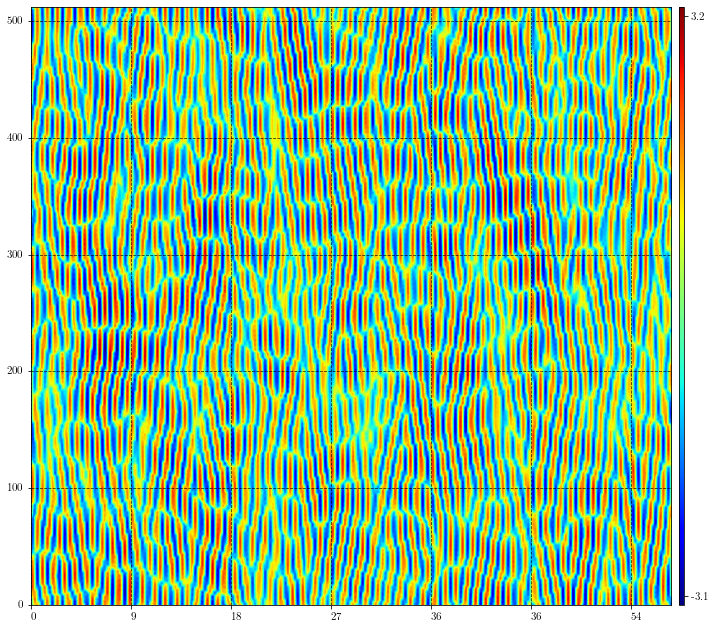

In [95]:
np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters['dx']))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters['dt']))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)


good_large_guess = OrbitKS(state=np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.),
                                                                      state_type='field', T=512, L=512).rescale(2.5, rescaling_method='absolute')
good_large_guess.plot(padding=True)

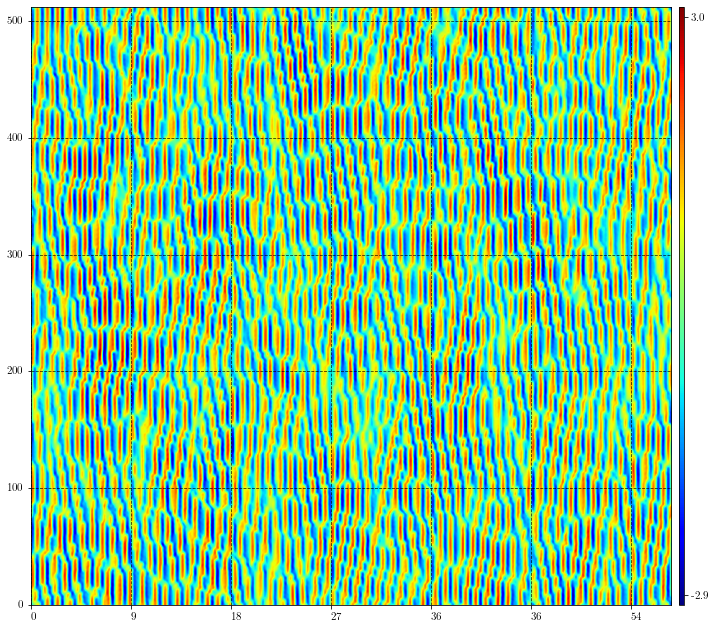

In [101]:
tmp_stage_1.orbit.plot()

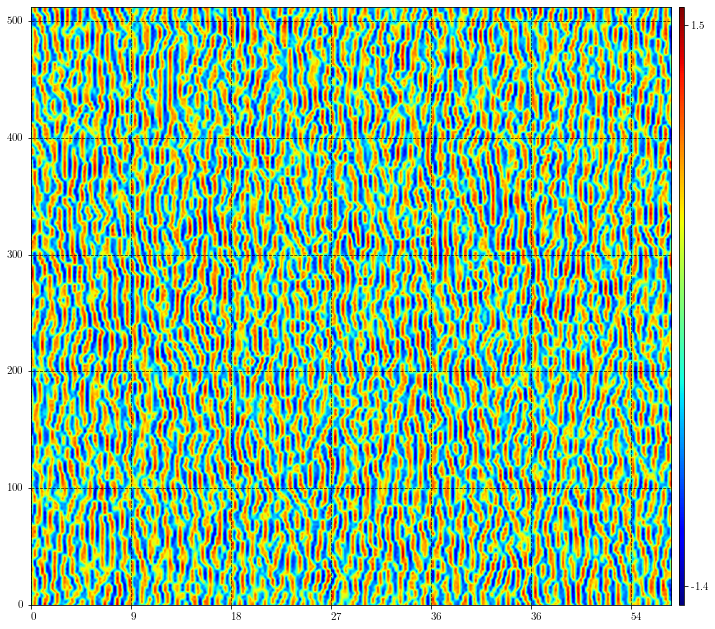

In [11]:
np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters['dx']))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters['dt']))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)


good_large_guess = OrbitKS(state=np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.),
                                                                      state_type='field', T=512, L=512)
good_large_guess.plot(padding=True)

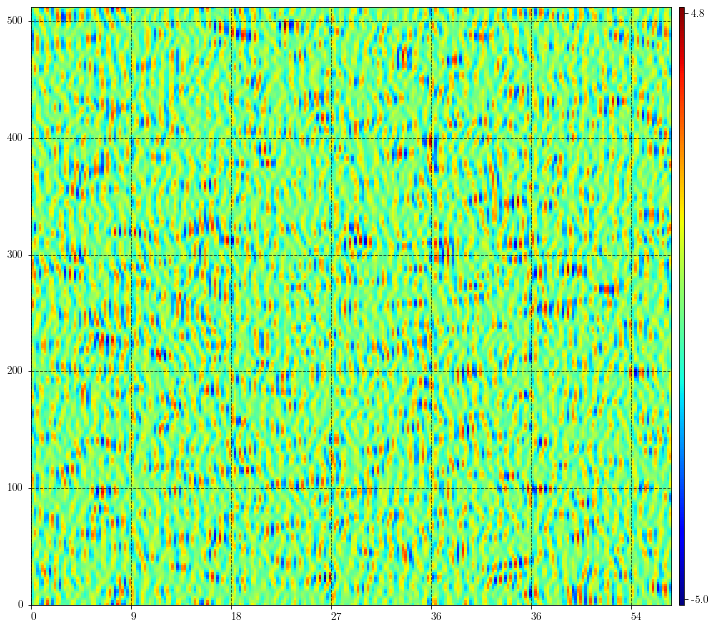

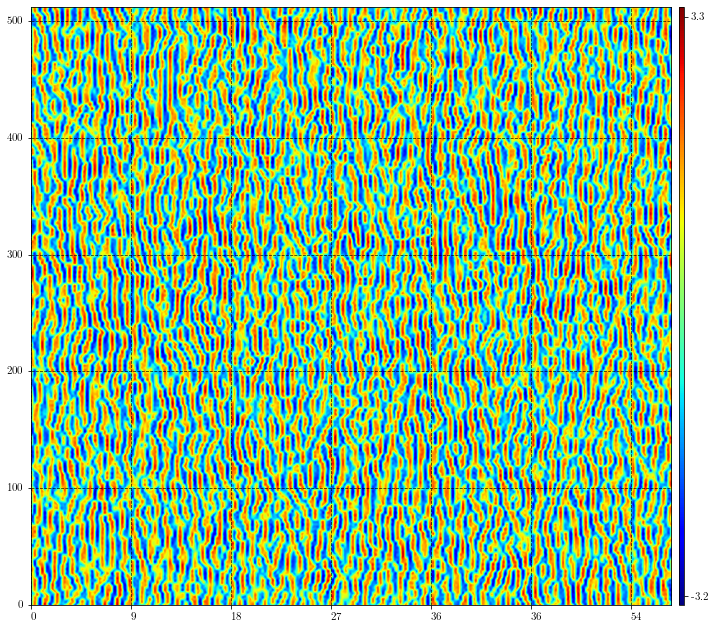

In [14]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 20
sigma_space = 15

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters['dx']))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters['dt']))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)
test_orbit.plot()

good_large_guess2 = OrbitKS(state=np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.),
                                                                      state_type='field', T=512, L=512).rescale(2.5)

np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.)

good_large_guess2.plot(padding=True)

#### Gaussian with different std

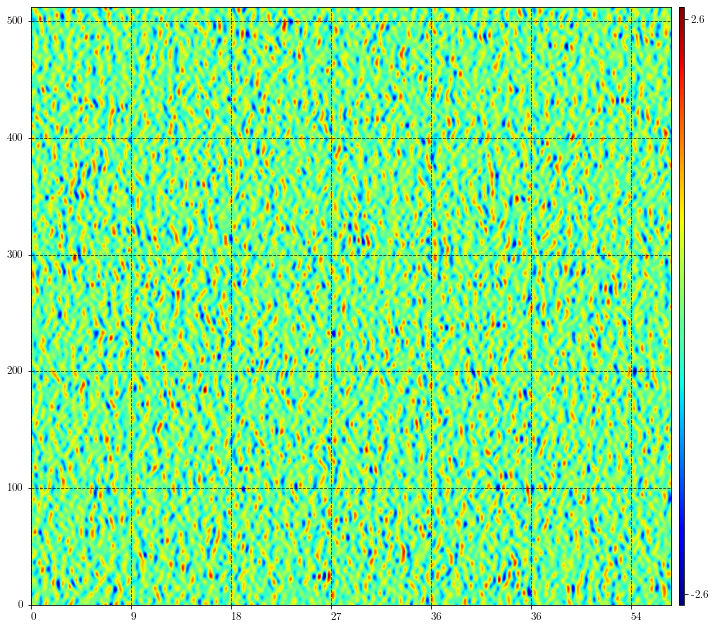

In [5]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 20
sigma_space = 15

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters['dx']))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters['dt']))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)


good_large_guess2 = OrbitKS(state=np.sign(test_orbit.convert(to='modes').state) * np.abs(test_orbit.convert(to='modes').state)**(1./3.),
                                                                      state_type='modes', T=512, L=512).rescale(2.5)



good_large_guess2.plot(padding=True)

In [6]:
large_result = converge(good_large_guess)

Starting adj numerical method. Initial residual 21340.23160121043
........................Step number 2500 residual 19.762386209922465
........................Step number 5000 residual 8.982139516243546
........................Step number 7500 residual 5.62851396959022
........................Step number 10000 residual 4.594929047940307
........................Step number 12500 residual 3.929396746485603
........................Step number 15000 residual 3.4100635932453396
........................Step number 17500 residual 3.0038499473515485
........................Step number 20000 residual 2.674395342219975
........................Step number 22500 residual 2.3932596581787418
........................Step number 25000 residual 2.152370458393731
........................Step number 27500 residual 1.9553517130973326
........................Step number 30000 residual 1.7881062359145605
........................Step number 32500 residual 1.6460964021393496
........................Step numbe

........................Step number 290000 residual 0.1392936017824127
........................Step number 292500 residual 0.13770782831157014
........................Step number 295000 residual 0.1361293238224092
........................Step number 297500 residual 0.13455658101647447
........................Step number 300000 residual 0.13299273657327512
........................Step number 302500 residual 0.13144686598516106
........................Step number 305000 residual 0.12992995554967093
........................Step number 307500 residual 0.12844848949644194
........................Step number 310000 residual 0.12700298119048273
........................Step number 312500 residual 0.1255907643139492
........................Step number 315000 residual 0.12420850196684616
........................Step number 317500 residual 0.12285320130055044
........................Step number 320000 residual 0.12152241623800304
........................Step number 322500 residual 0.1202141901833

........................Step number 575000 residual 0.04656424086402477
........................Step number 577500 residual 0.04624773304486347
........................Step number 580000 residual 0.04593545172906379
........................Step number 582500 residual 0.045627368275146095
........................Step number 585000 residual 0.04532346491329854
........................Step number 587500 residual 0.04502373101922169
........................Step number 590000 residual 0.04472815911732932
........................Step number 592500 residual 0.04443674101549434
........................Step number 595000 residual 0.04414946443115033
........................Step number 597500 residual 0.04386631042892285
........................Step number 600000 residual 0.04358725193784952
........................Step number 602500 residual 0.04331225352619706
........................Step number 605000 residual 0.043041272464496697
........................Step number 607500 residual 0.04277426

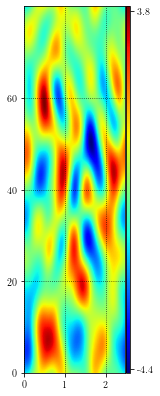

In [6]:
N = 64
M = 32
T = 80
L = 22
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 2
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)
test_orbit.plot()

#### Gaussian with different std

In [4]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

sigma_time = 20
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

# "Modulated"

others methods : 

    1. truncation
    2. scaling by linear component
    3. scaling like sqrt((j-sms)**2)/sms
    4. only scaling after j > sms

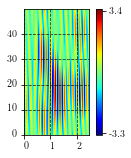

In [12]:
modes = np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', orbit_parameters=tester.orbit_parameters).rescale(3)
test_orbit.plot()

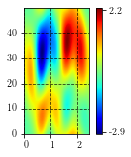

In [20]:
OrbitKS(xscale=2, tscale=1, spectrum='linear', orbit_parameters=tester.orbit_parameters).rescale(3).plot()

In [15]:
import time
t0 = time.time()
result = converge(test_orbit, verbose=True)
t1 = time.time()
t1-t0, (t1-t0 / result.n_iter)

Starting gradient descent. Initial residual=11890232.99807573, target=1.024e-06, max_iter=16384
############ Residual=6.873054772648734 after 4096 gradient descent iterations
############# Residual=3.2593638834419134 after 8192 gradient descent iterations
############ Residual=1.8652075765912313 after 12288 gradient descent iterations
############# Residual=1.2972984399475045 after 16384 gradient descent iterations
Starting lstsq. Initial residual=1.2972984399475045, target=1.024e-06
5555555555554443446776655 Residual=0.6121614517814536 after 25 lstsq iterations
5455555555666666666666666 Residual=0.41535112884895004 after 50 lstsq iterations
665556665657
Failed to converge. Exiting with residual 0.3628075165707354


TypeError: unsupported operand type(s) for /: 'float' and 'tuple'

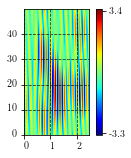

In [12]:
modes = np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', orbit_parameters=tester.orbit_parameters).rescale(3)
test_orbit.plot()

In [ ]:
result.orbit.residual()

In [ ]:
result.orbit.plot()

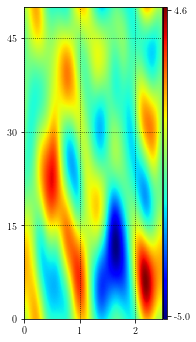

In [5]:
N = 32
M = 32
T = 50
L = 22
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))
space[space<sms] = sms
abs_mollifier = np.exp(-1*(np.abs(space-sms)/sms))
modulated_time = time.copy()
modulated_time[modulated_time <= tms] = 1
modulated_time[modulated_time > tms] = 0

modes = 3*np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

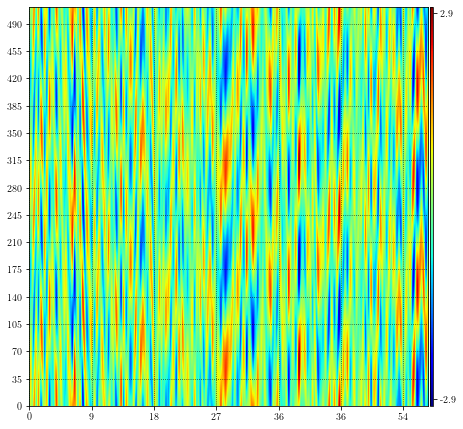

In [6]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))
space[space<sms] = sms
abs_mollifier = np.exp(-1*(np.abs(space-sms)/sms))
modulated_time = time.copy()
modulated_time[modulated_time != tms] = 0
modulated_time[modulated_time == tms] = 1

modes = 3*np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

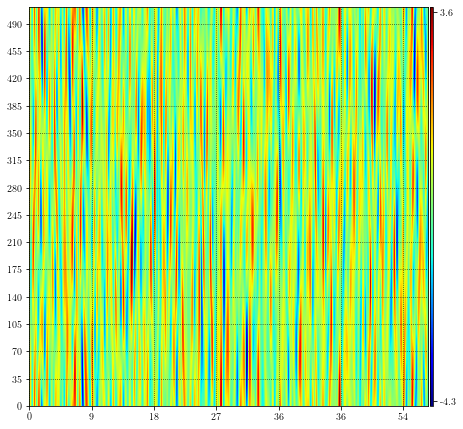

In [57]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

abs_mollifier = np.exp(-1*(np.abs(space-sms)/sms))

modulated_time = time.copy()
modulated_time[modulated_time <= tms] = 1
modulated_time[modulated_time > tms] = 0

modes = 3*np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

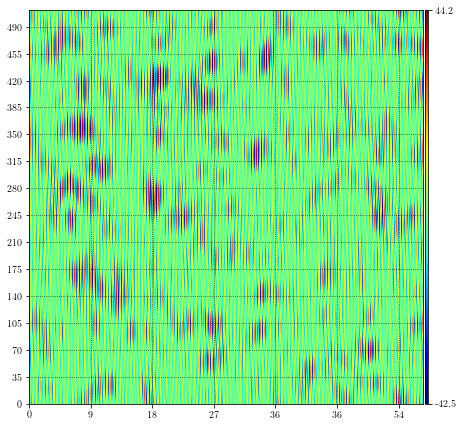

In [56]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T//10))

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

lin_mollifier = (2*pi*space/L)**2-(2*pi*space/L)**4
lin_mollifier = lin_mollifier / np.max(lin_mollifier)

modulated_time = time.copy()
modulated_time[modulated_time <= tms] = 1
modulated_time[modulated_time > tms] = 0

modes = 3*np.multiply(modulated_time, np.multiply(lin_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()